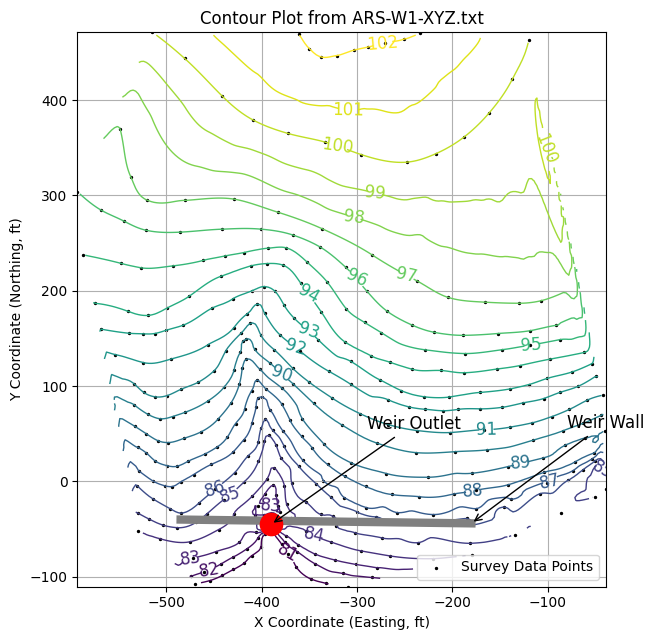

In [60]:
import pandas
import numpy
import matplotlib.pyplot
from scipy.interpolate import griddata

# === Load Data ===
filename = 'ARS-W1-XYZ.txt'
my_xyz = pandas.read_csv(filename, sep='\t')
my_xyz = pandas.DataFrame(my_xyz)

coord_x = my_xyz['X-Easting'].values.tolist()
coord_y = my_xyz['Y-Northing'].values.tolist()
coord_z = my_xyz['Z-Elevation'].values.tolist()
coord_xy = numpy.column_stack((coord_x, coord_y))

# === Create Grid ===
lon = numpy.linspace(min(coord_x), max(coord_x), 200)
lat = numpy.linspace(min(coord_y), max(coord_y), 200)
X, Y = numpy.meshgrid(lon, lat)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic', fill_value=numpy.nan)

# === Plotting ===
use_basemap = False  # <- Flip to True if you ever want to bring it back

if use_basemap:
    matplotlib.pyplot.rcParams["figure.figsize"] = [10.0, 10.0]
    matplotlib.pyplot.rcParams["figure.autolayout"] = True
    im = matplotlib.pyplot.imread("SomewhereUSABaseMap.png")

fig, ax = matplotlib.pyplot.subplots()

if use_basemap:
    ax.imshow(im, extent=[0, 3361, 0, 1458])

# Contours
levels = [float(i) for i in range(81,103,1)]
CS = ax.contour(X, Y, Z, levels, linewidths=1)
ax.clabel(CS, inline=2, fontsize=12)

# Titles and limits
ax.set_title(f'Contour Plot from {filename}')
ax.set_xlim([min(coord_x), max(coord_x)])
ax.set_ylim([min(coord_y), max(coord_y)])
ax.set_aspect('equal', adjustable='box')  # <- Enforce 1:1 aspect ratio

# Plot a line segment to represent the weir wall
# Line segment coordinates
x1, y1 = -485, -40
x2, y2 = -180, -44

# Draw the line segment
ax.plot([x1, x2], [y1, y2], color='grey', linewidth=6)

# Annotate the segment
ax.annotate("Weir Wall",             # Text label
            xy=(x2, y2),   # Point being annotated
            xytext=(x2 + 100, y2 + 100),  # Label position
            arrowprops=dict(arrowstyle='->', color='black'),
            fontsize=12, color='black')

# Plot a red filled circle at the gage location
x_marker = -390
y_marker = -45
ax.plot(x_marker, y_marker, 'o', markersize=16, color='red')

# Annotate the marker
ax.annotate("Weir Outlet",             # Text label
            xy=(x_marker, y_marker),   # Point being annotated
            xytext=(x_marker + 100, y_marker + 100),  # Label position
            arrowprops=dict(arrowstyle='->', color='black'),
            fontsize=12, color='black')

ax.set_xlabel("X Coordinate (Easting, ft)")
ax.set_ylabel("Y Coordinate (Northing, ft)")

ax.grid(True)

# Add scatter plot of original XYZ data
ax.scatter(coord_x, coord_y, color='black', s=2, label='Survey Data Points')
ax.legend(loc='lower right')

matplotlib.pyplot.show()


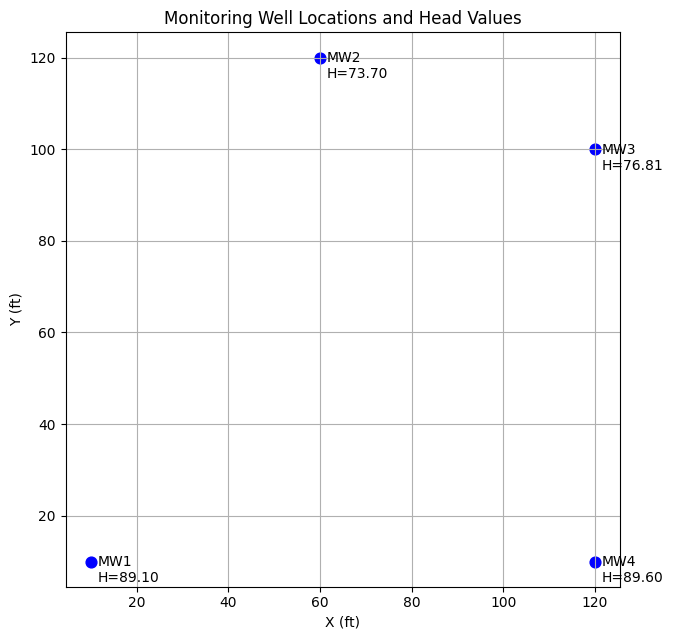

In [65]:
import matplotlib.pyplot as plt

# Data
names = ['MW1', 'MW2', 'MW3', 'MW4']
x_coords = [10.0, 60.0, 120.0, 120.0]
y_coords = [10.0, 120.0, 100.0, 10.0]
heads = [89.1, 73.7, 76.81, 89.6]

# Create plot
fig, ax = plt.subplots()
ax.scatter(x_coords, y_coords, color='blue', s=60)

# Annotate each point with the head value
for name, x, y, h in zip(names, x_coords, y_coords, heads):
    ax.annotate(f"{name}\nH={h:.2f}", (x, y), textcoords="offset points", xytext=(5,-15), ha='left')

# Formatting
ax.set_xlabel("X (ft)")
ax.set_ylabel("Y (ft)")
ax.set_title("Monitoring Well Locations and Head Values")
ax.set_aspect('equal')  # Enforce 1:1 aspect ratio
ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()

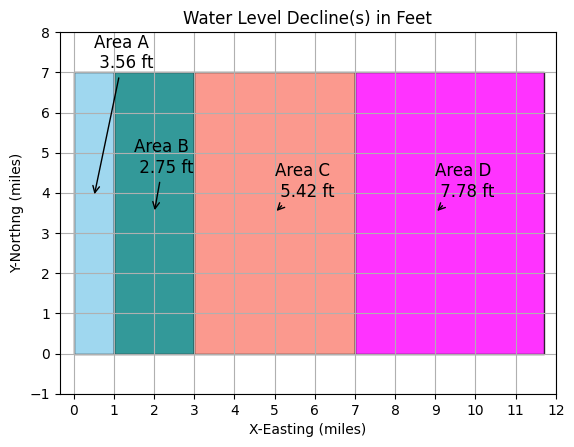

In [45]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define rectangle corners: [(x0, y0, x1, y1), ...]
# 
rectangles = [
    (0, 0, 1, 7),    # Rectangle 1
    (1, 0, 1+2, 7),    # Rectangle 2
    (1+2, 0, 1+2+4, 7),    # Rectangle 3
    (1+2+4, 0, 1+2+4+4.71, 7)     # Rectangle 4
]

# Define fill colors for each rectangle
colors = ['skyblue', 'teal', 'salmon', 'magenta']

# Create plot
fig, ax = plt.subplots()
for (x0, y0, x1, y1), color in zip(rectangles, colors):
    width = x1 - x0
    height = y1 - y0
    rect = patches.Rectangle((x0, y0), width, height,
                             linewidth=1,
                             edgecolor='black',
                             facecolor=color,
                             alpha=0.8)
    ax.add_patch(rect)

# Annotate the areas
ax.annotate("Area A \n 3.56 ft",             # Text label
            xy=(0.5, 3.9),   # Point being annotated
            xytext=(0.5, 7.1),  # Label position
            arrowprops=dict(arrowstyle='->', color='black'),
            fontsize=12, color='black')

ax.annotate("Area B \n 2.75 ft",             # Text label
            xy=(2.0, 3.5),   # Point being annotated
            xytext=(1.5, 4.5),  # Label position
            arrowprops=dict(arrowstyle='->', color='black'),
            fontsize=12, color='black')

ax.annotate("Area C \n 5.42 ft",             # Text label
            xy=(5, 3.5),   # Point being annotated
            xytext=(5, 3.9),  # Label position
            arrowprops=dict(arrowstyle='->', color='black'),
            fontsize=12, color='black')

ax.annotate("Area D \n 7.78 ft",             # Text label
            xy=(9, 3.5),   # Point being annotated
            xytext=(9, 3.9),  # Label position
            arrowprops=dict(arrowstyle='->', color='black'),
            fontsize=12, color='black')

# Formatting
ax.set_aspect('equal')  # Keep 1:1 aspect ratio
ax.set_xlim(-0.35, 12)
ax.set_ylim(-1, 8)
ax.set_xlabel("X-Easting (miles)")
ax.set_ylabel("Y-Northng (miles)")
ax.set_title("Water Level Decline(s) in Feet")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid(True)
plt.show()

In [50]:
! pdflatex ce-3354-ex3-2025-3.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./ce-3354-ex3-2025-3.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size12.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/parskip/parskip.sty
(/usr/share/texlive/texmf-dist/tex/latex/kvoptions/kvoptions.sty
(/usr/share/texlive/texmf-dist/tex/generic/ltxcmds/ltxcmds.sty)
(/usr/share/texlive/texmf-dist/tex/generic/kvsetkeys/kvsetkeys.sty))
(/usr/share/texlive/texmf-dist/tex/latex/etoolbox/etool